In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [74]:
data = pd.read_csv('data_breast.csv')
data.shape

(569, 33)

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [76]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [77]:
dict_diag = {"B": 0, "M": 1}

In [78]:
data.diagnosis = data.diagnosis.map(dict_diag)

In [79]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [80]:
l= ['Unnamed: 32','id']
data = data.drop(l,axis = 1)

In [81]:
y = data.diagnosis
X = data.drop('diagnosis', axis = 1)
cols = X.columns

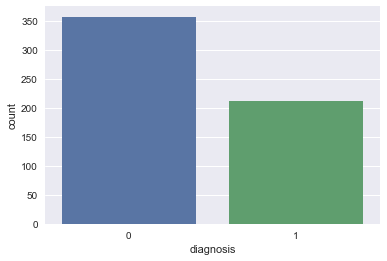

In [82]:
ax = sns.countplot(y)

In [83]:
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [84]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [85]:
X.mode()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,12.34,14.93,82.61,512.2,0.1007,0.1147,0.0,0.0,0.1601,0.05667,...,12.36,17.70,101.7,284.4,0.1216,0.1486,0.0,0.0,0.2226,0.07427
1,NaN,15.70,87.76,NaN,NaN,0.1206,NaN,NaN,0.1714,0.05907,...,NaN,27.26,105.9,402.8,0.1223,0.3416,NaN,NaN,0.2369,NaN
2,NaN,16.84,134.70,NaN,NaN,NaN,NaN,NaN,0.1717,0.05913,...,NaN,NaN,117.7,439.6,0.1234,NaN,NaN,NaN,0.2383,NaN
3,NaN,16.85,NaN,NaN,NaN,NaN,NaN,NaN,0.1769,0.06113,...,NaN,NaN,NaN,458.0,0.1256,NaN,NaN,NaN,0.2972,NaN
4,NaN,17.46,NaN,NaN,NaN,NaN,NaN,NaN,0.1893,0.06782,...,NaN,NaN,NaN,472.4,0.1275,NaN,NaN,NaN,0.3109,NaN
5,NaN,18.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,489.5,0.1312,NaN,NaN,NaN,0.3196,NaN
6,NaN,18.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,546.7,0.1347,NaN,NaN,NaN,NaN,NaN
7,NaN,19.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,547.4,0.1401,NaN,NaN,NaN,NaN,NaN
8,NaN,20.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,624.1,0.1415,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,698.8,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
scaler = StandardScaler().fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = cols

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

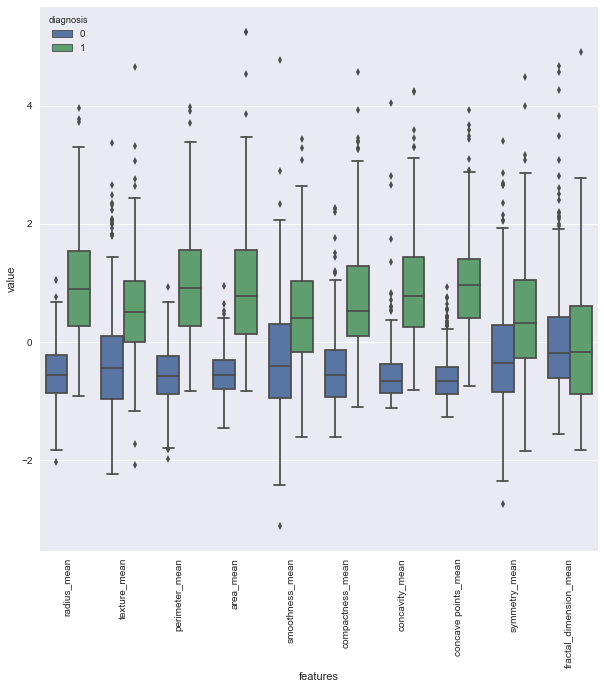

In [87]:
data = X 
data = pd.concat([y,data.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

In [88]:
data = X
data = pd.concat([y,data.iloc[:,20:31]],axis=1)
data.head()
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

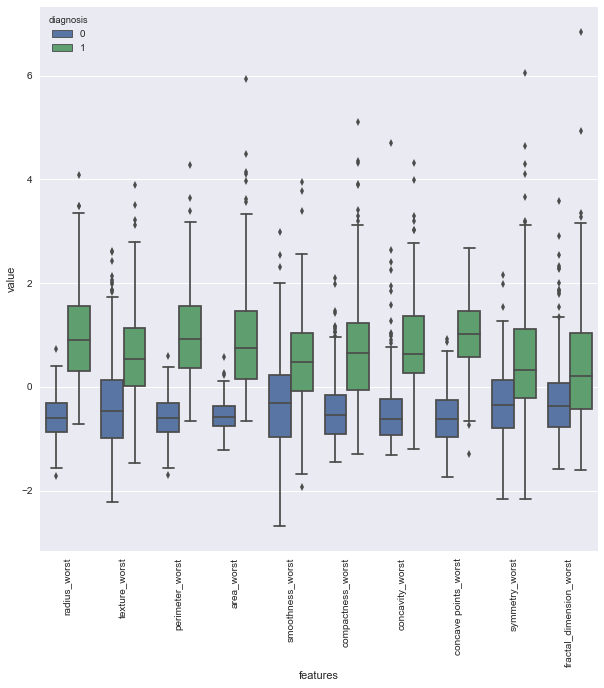

In [89]:
plt.figure(figsize=(10,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

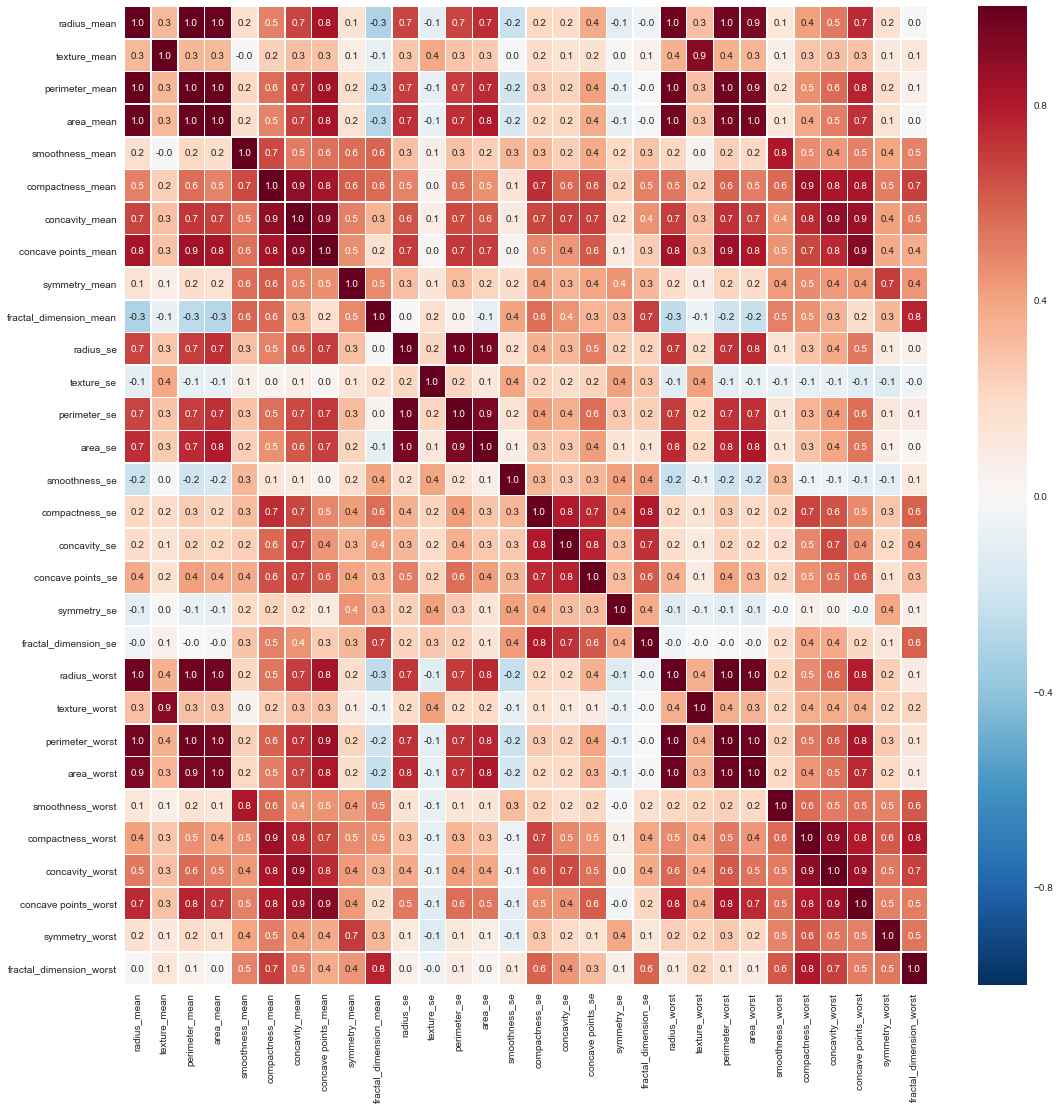

In [90]:
corr = X.corr()
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [91]:
# Высокий уровень взаимной корреляции признаков. Необходимо сокращать размерность.

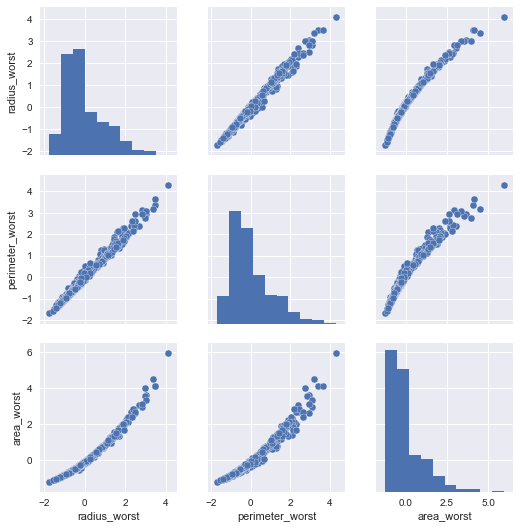

In [92]:
df = X.loc[:,['radius_worst','perimeter_worst','area_worst']]
sns.pairplot(df)

In [93]:
stats.ttest_ind(X['radius_worst'], X['perimeter_worst']) 

Ttest_indResult(statistic=-7.5759937582866347e-15, pvalue=0.999999999999994)

In [94]:
stats.ttest_ind(X['radius_worst'], X['area_worst']) 

Ttest_indResult(statistic=-1.3889321890192164e-14, pvalue=0.9999999999999889)

In [95]:
stats.ttest_ind(X['perimeter_worst'], X['area_worst']) 

Ttest_indResult(statistic=-6.3133281319055297e-15, pvalue=0.999999999999995)

In [96]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [97]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
rfclass = RandomForestClassifier()      
rfe = RFE(estimator=rfclass, n_features_to_select=10, step=1)
rfe = rfe.fit(x_train, y_train)
print('Chosen best 10 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 10 feature by rfe: Index(['texture_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'concavity_worst',
       'concave points_worst'],
      dtype='object')


In [98]:
rfclf = RandomForestClassifier(random_state=42)      
rfclf = rfclf.fit(x_train,y_train)

ac = accuracy_score(y_test, rfclf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, rfclf.predict(x_test))
cm

Accuracy is:  0.973684210526


array([[74,  0],
       [ 3, 37]])

In [99]:
x_train_redused = x_train.loc[:, ['concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concave points_worst', 'symmetry_worst']]
x_test_reduced = x_test.loc[:, ['concavity_mean', 'concave points_mean', 'area_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'concave points_worst', 'symmetry_worst']]
rfclf1 = RandomForestClassifier(random_state=42)      
rfclf1 = rfclf1.fit(x_train_redused,y_train)

ac = accuracy_score(y_test, rfclf1.predict(x_test_reduced))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, rfclf1.predict(x_test_reduced))
cm

Accuracy is:  0.964912280702


array([[74,  0],
       [ 4, 36]])

In [100]:
#Выбираем стратегию Undersampling|Oversampling 
#https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [101]:
data2 = pd.concat([y,X],axis=1)

In [102]:
count_class_0, count_class_1 = data2.diagnosis.value_counts()
df_class_0 = data2[data2['diagnosis'] == 0]
df_class_1 = data2[data2['diagnosis'] == 1]

Random under-sampling:
1    212
0    212
Name: diagnosis, dtype: int64


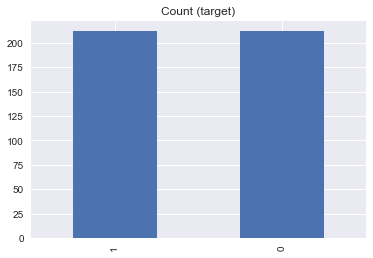

In [103]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under.diagnosis.value_counts())

df_under.diagnosis.value_counts().plot(kind='bar', title='Count (target)');

In [104]:
y = df_under.diagnosis
X = df_under.drop('diagnosis', axis = 1)
cols = X.columns

In [105]:
scaler = StandardScaler().fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = cols

In [106]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [107]:
rfclf = RandomForestClassifier(random_state=42)      
rfclf = rfclf.fit(x_train,y_train)

ac = accuracy_score(y_test, rfclf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, rfclf.predict(x_test))
cm

Accuracy is:  0.905882352941


array([[42,  1],
       [ 7, 35]])

In [108]:
#Стратегия undersampling снижает accuracy

Random over-sampling:
1    357
0    357
Name: diagnosis, dtype: int64


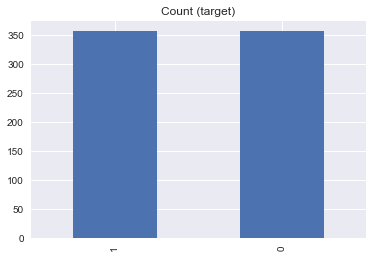

In [109]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over.diagnosis.value_counts())

df_over.diagnosis.value_counts().plot(kind='bar', title='Count (target)');

In [110]:
y = df_over.diagnosis
X = df_over.drop('diagnosis', axis = 1)
cols = X.columns

In [111]:
scaler = StandardScaler().fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = cols
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 30 columns):
radius_mean                714 non-null float64
texture_mean               714 non-null float64
perimeter_mean             714 non-null float64
area_mean                  714 non-null float64
smoothness_mean            714 non-null float64
compactness_mean           714 non-null float64
concavity_mean             714 non-null float64
concave points_mean        714 non-null float64
symmetry_mean              714 non-null float64
fractal_dimension_mean     714 non-null float64
radius_se                  714 non-null float64
texture_se                 714 non-null float64
perimeter_se               714 non-null float64
area_se                    714 non-null float64
smoothness_se              714 non-null float64
compactness_se             714 non-null float64
concavity_se               714 non-null float64
concave points_se          714 non-null float64
symmetry_se                714 

In [112]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [113]:
rfclf = RandomForestClassifier(random_state=42)      
rfclf = rfclf.fit(x_train,y_train)

ac = accuracy_score(y_test, rfclf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, rfclf.predict(x_test))
cm

Accuracy is:  0.958041958042


array([[62,  4],
       [ 2, 75]])

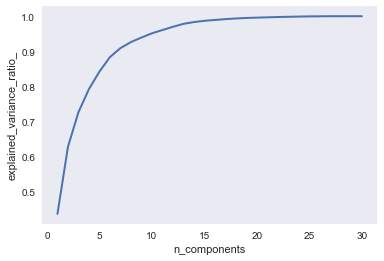

In [114]:
pca = PCA().fit(X)

cum_evr = np.cumsum(pca.explained_variance_ratio_)
xs = np.arange(cum_evr.size) + 1
plt.plot(xs, cum_evr, linewidth=2)
plt.grid()
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

In [115]:
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(X_pca)
X_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 20 columns):
0     714 non-null float64
1     714 non-null float64
2     714 non-null float64
3     714 non-null float64
4     714 non-null float64
5     714 non-null float64
6     714 non-null float64
7     714 non-null float64
8     714 non-null float64
9     714 non-null float64
10    714 non-null float64
11    714 non-null float64
12    714 non-null float64
13    714 non-null float64
14    714 non-null float64
15    714 non-null float64
16    714 non-null float64
17    714 non-null float64
18    714 non-null float64
19    714 non-null float64
dtypes: float64(20)
memory usage: 111.6 KB


In [116]:
#oversampling повышает accuracy, сделаем PCA на 20 компонент.
#Сделаем кросс-валидацию и выберем модель.

In [117]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [118]:
num_folds = 10
seed = 7

In [119]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [120]:
LogReg = LogisticRegression()
results = cross_val_score(LogReg, X_pca, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 97.760% (0.929%)


In [121]:
from sklearn.svm import SVC

In [122]:
svecm = SVC()
results = cross_val_score(svecm, X_pca, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 97.334% (1.334%)


In [123]:
from sklearn.tree import DecisionTreeClassifier
destree = DecisionTreeClassifier()
results = cross_val_score(destree, X_pca, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

Accuracy: 96.228% (2.645%)


In [124]:
import xgboost
# Градиентный бустинг показывает лучший Accuracy 
#без сокращения размерности методом главных компонент

ModuleNotFoundError: No module named 'xgboost'

In [125]:
xgb = xgboost.XGBClassifier(max_depth=5, random_seed = 42, n_jobs=10)
results = cross_val_score(xgb, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0
))

NameError: name 'xgboost' is not defined

In [126]:
from sklearn.metrics import classification_report

In [127]:
test_size = 0.2
seed = 7
model = LogReg
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=test_size,
random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.97      0.98      0.98        66
          1       0.99      0.97      0.98        77

avg / total       0.98      0.98      0.98       143



In [58]:
predicted_proba_LogReg = model.predict_proba(X_pca)
for i in predicted_proba_LogReg:
    print("1: {:f}, 0: {:f}".format(i[0], i[1]))

1: 0.910104, 0: 0.089896
1: 0.998415, 0: 0.001585
1: 0.999999, 0: 0.000001
1: 0.999995, 0: 0.000005
1: 0.999998, 0: 0.000002
1: 0.996602, 0: 0.003398
1: 0.805633, 0: 0.194367
1: 0.999860, 0: 0.000140
1: 0.999711, 0: 0.000289
1: 0.999796, 0: 0.000204
1: 0.998962, 0: 0.001038
1: 0.999922, 0: 0.000078
1: 0.999996, 0: 0.000004
1: 0.999998, 0: 0.000002
1: 0.999976, 0: 0.000024
1: 1.000000, 0: 0.000000
1: 0.999886, 0: 0.000114
1: 0.999376, 0: 0.000624
1: 0.849461, 0: 0.150539
1: 0.999563, 0: 0.000437
1: 1.000000, 0: 0.000000
1: 0.999278, 0: 0.000722
1: 0.999637, 0: 0.000363
1: 0.997150, 0: 0.002850
1: 0.996216, 0: 0.003784
1: 0.578932, 0: 0.421068
1: 0.996209, 0: 0.003791
1: 0.971120, 0: 0.028880
1: 0.881833, 0: 0.118167
1: 0.966855, 0: 0.033145
1: 0.997891, 0: 0.002109
1: 0.986537, 0: 0.013463
1: 0.999987, 0: 0.000013
1: 0.999999, 0: 0.000001
1: 0.999798, 0: 0.000202
1: 1.000000, 0: 0.000000
1: 0.997096, 0: 0.002904
1: 0.998456, 0: 0.001544
1: 0.999983, 0: 0.000017
1: 0.960331, 0: 0.039669


In [59]:
y_prob = predicted_proba_LogReg[:, 0]
print("Brier_score: %.3f%% " % (brier_score_loss(y, y_prob)))

Brier_score: 0.950% 


In [60]:
test_size = 0.2
seed = 7
model = svecm
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=test_size,
random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.97      1.00      0.99        66
          1       1.00      0.97      0.99        77

avg / total       0.99      0.99      0.99       143



In [61]:
test_size = 0.2
seed = 7
model = destree
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, y, test_size=test_size,
random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

             precision    recall  f1-score   support

          0       1.00      0.91      0.95        66
          1       0.93      1.00      0.96        77

avg / total       0.96      0.96      0.96       143



In [62]:
predicted_proba_DesTree = model.predict_proba(X_pca)
for i in predicted_proba_DesTree:
    print("0: {:f}, 1: {:f}".format(i[0], i[1]))

0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 0.000000, 1: 1.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000
0: 1.000000, 1: 0.000000


In [63]:
test_size = 0.2
seed = 7
model = xgb
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=test_size,
random_state=seed)
model.fit(X_train, Y_train)
predicted = model.predict(X_test)
report = classification_report(Y_test, predicted)
print(report)

NameError: name 'xgb' is not defined

In [64]:
predicted_proba_xgb = model.predict_proba(X)
for i in predicted_proba_xgb:
    print("0: {:f}, 1: {:f}".format(i[0], i[1]))

ValueError: Number of features of the model must match the input. Model n_features is 20 and input n_features is 30 

In [63]:
y_prob = predicted_proba_xgb[:, 0]

In [64]:
print("Brier_score: %.3f%% " % (brier_score_loss(y, y_prob))) 

Brier_score: 0.978% 
